#Assignment 1: Logistic Regression

## Dataset load & Plot

In [62]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from warnings import filterwarnings
filterwarnings('ignore')

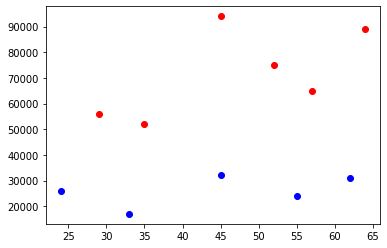

In [63]:
data = np.loadtxt('data.csv', delimiter=',')
X = data[:, :2]
y = data[:, 2]
label_mask = np.equal(y, 1)

plt.scatter(X[:, 0][label_mask], X[:, 1][label_mask], color='red')
plt.scatter(X[:, 0][~label_mask], X[:, 1][~label_mask], color='blue')
plt.show()

# Problem 1-1. Logistic regression model using sklearn packages.

Train your data using LogisticRegression classes from skikit-learn library.


In [64]:
def learn_and_return_weights(X, y):
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    model.fit(X,y)
    w = sum(model.coef_)
    b = sum(model.intercept_)  
    return w, b

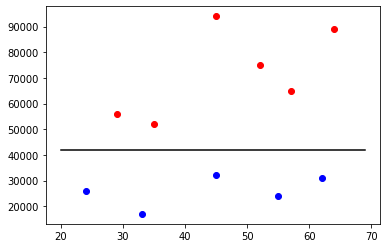

In [65]:
def plot_data_and_weights(X, y, w, b):
    plt.scatter(X[:, 0][label_mask], X[:, 1][label_mask], color='red')
    plt.scatter(X[:, 0][~label_mask], X[:, 1][~label_mask], color='blue')
    
    x_lin = np.arange(20, 70)
    y_lin = -(0.5 + b + w[0] * x_lin) / w[1]

    plt.plot(x_lin, y_lin, color='black');
    plt.show()

w, b = learn_and_return_weights(X, y)
plot_data_and_weights(X, y, w, b)

## Problem 1-2. Implement Logistic Regression Model

Implement Logistic Regression without using scikit-learn libraries.


In [82]:
def sigmoid(z):
    # YOUR CODE COMES HERE
    return 1 / (1 + np.exp(-z))


def binary_cross_entropy_loss(y_pred, target):
    # YOUR CODE COMES HERE
    return (-y_pred * np.log(target) - (1 - y_pred) * np.log(1 - target)).mean()

def learn_and_return_weights_numpy(X1, Y, lr=.01, iter=100000):
    #gradient descent

    bb = 0
    w = np.random.uniform(1,2,X1.shape[1])
    for i in range(iter):
      z = np.dot(X1, w) + bb
      pred = sigmoid(z)
      err = binary_cross_entropy_loss(pred, Y)

      dw = (pred - Y).dot(X1)
      db = (pred - Y).mean()
      w -= lr * dw
      bb -= lr * db

    return w, bb

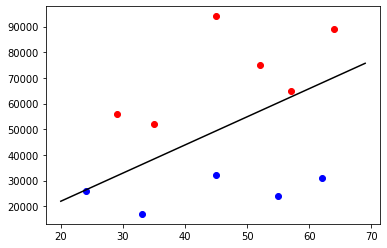

In [83]:
w, b = learn_and_return_weights_numpy(X, y)
plot_data_and_weights(X, y, w, b)